In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.4/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 0.9/124.9 MB 6.4 MB/s eta 0:00:20
    --------------------------------------- 1.6/124.9 MB 8.4 MB/s eta 0:00:15
    --------------------------------------- 2.7/124.9 MB 11.6 MB/s eta 0:00:11
   - -------------------------------------- 3.8/124.9 MB 13.5 MB/s eta 0:00:09
   - -------------------------------------- 4.5/124.9 MB 13.8 MB/s eta 0:00:09
   - -------------------------------------- 5.0/124.9 MB 13.4 MB/s eta 0:00:09
   - -------------------------------------- 5.4/124.9 MB 12.3 MB/s eta 0:00:10
   - -------------------------------------- 5.9/124.9 MB 12.5 MB/s eta 0:00:10
   -- ------------------------------------- 6.4/124.9 MB 12.0 MB/s eta 0:00:10
   -- ------------------------------------- 7.0/124.9 MB 12.4 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import IsolationForest,RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import log_loss,roc_auc_score,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from warnings import simplefilter
simplefilter("ignore")

EXPLORATORY DATA ANALYSIS

In [3]:
file_path=r"C:\Users\Mahalakshmi\OneDrive\Documents\creditcard.csv"
data=pd.read_csv(file_path)
pd.set_option("display.max_columns",1000)
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [5]:
print(data["Class"].value_counts())
print(data.head())

Class
0    284315
1       492
Name: count, dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

      

DATA EXPLORATION

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
print("rows --->",data.shape[0],"no's")
print("columns -->",data.shape[1],"no's")

rows ---> 284807 no's
columns --> 31 no's


In [11]:
unique_counts=data.nunique()
print(unique_counts)

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Distribution of V1....V28 Features

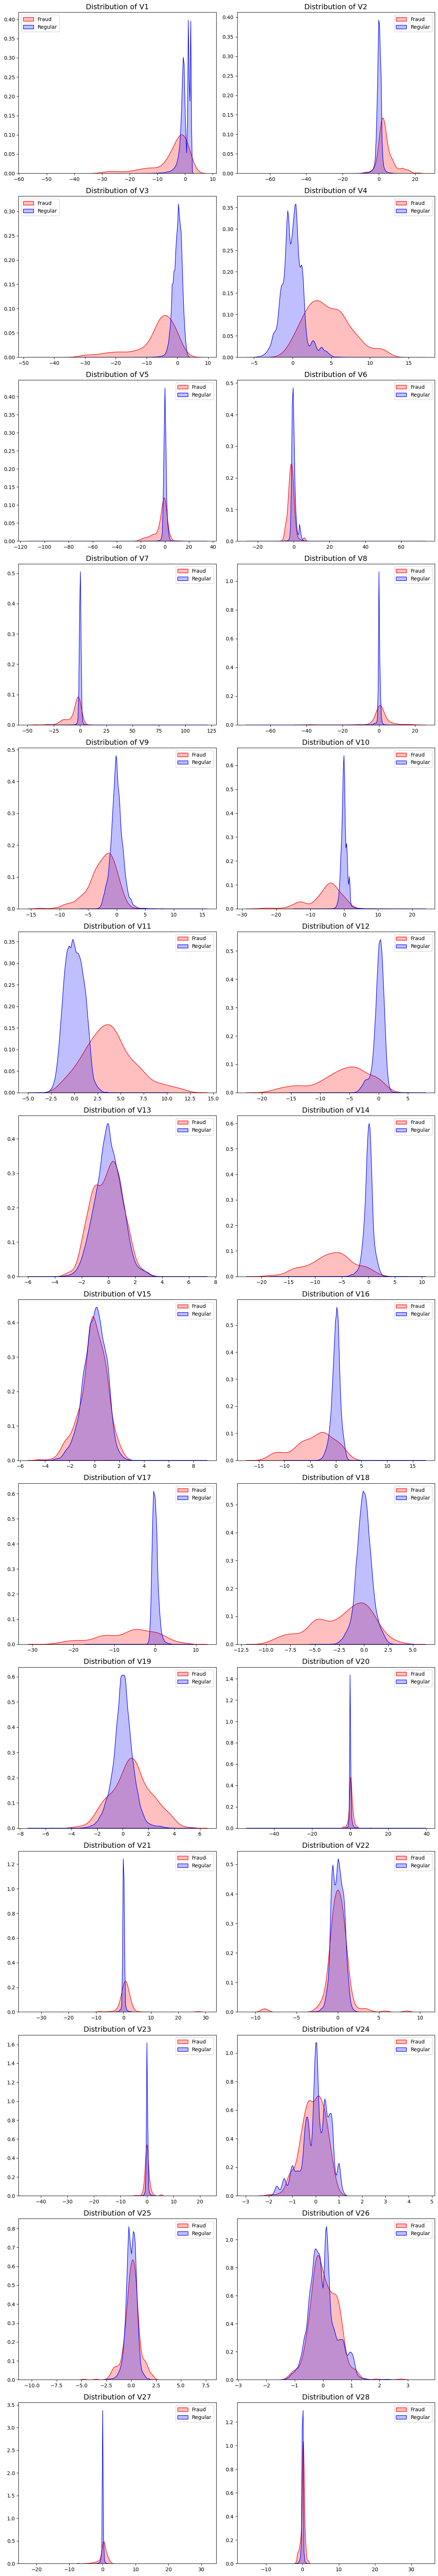

In [15]:
#Distribution of V1....V28 Features
num_features=28
num_cols=2
num_rows=num_features // num_cols + (num_features % num_cols > 0)
fig, axes=plt.subplots(num_rows,num_cols,figsize=(12,5*num_rows))
axes=axes.flatten()

for i in range(1,num_features+1):
    feature=f'V{i}'
    sns.kdeplot(data[data.Class==1][feature],ax=axes[i-1],color='red',label='Fraud',fill=True)
    sns.kdeplot(data[data.Class==0][feature],ax=axes[i-1],color='blue',label='Regular',fill=True)
    axes[i-1].set_title(f'Distribution of {feature}',fontsize=14)
    axes[i-1].set_xlabel('')
    axes[i-1].set_ylabel('')
    axes[i-1].legend()

plt.tight_layout()
plt.show()

Distribution PLOT of Time Variable

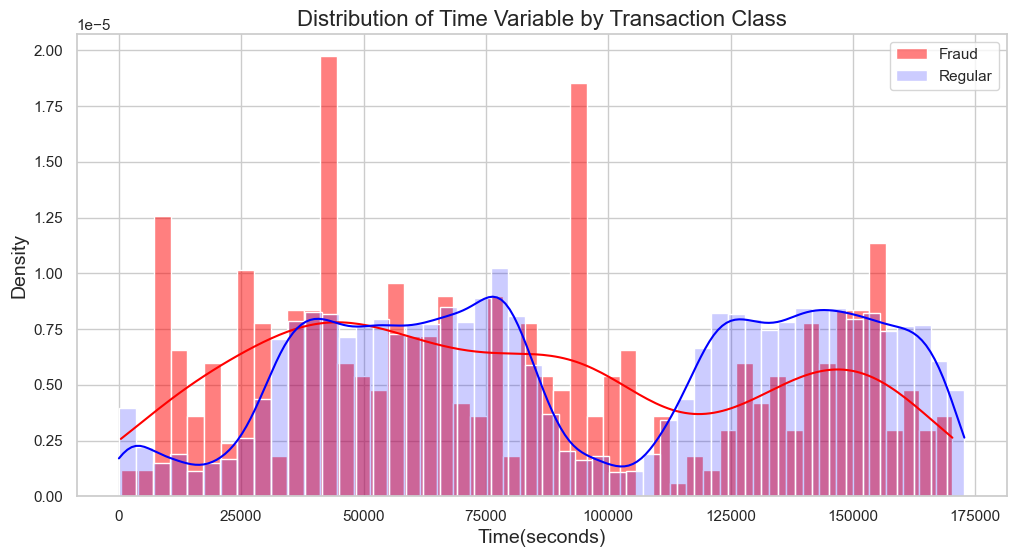

In [17]:
#Distribution plot of Time Variable
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.histplot(data[data.Class==1]['Time'],bins=50,kde=True,color='red',stat='density',alpha=0.5,label='Fraud')
sns.histplot(data[data.Class==0]['Time'],bins=50,kde=True,color='blue',stat='density',alpha=0.2,label='Regular')
plt.title('Distribution of Time Variable by Transaction Class',fontsize=16)
plt.xlabel('Time(seconds)',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend()
plt.show()

Distribution of Amount

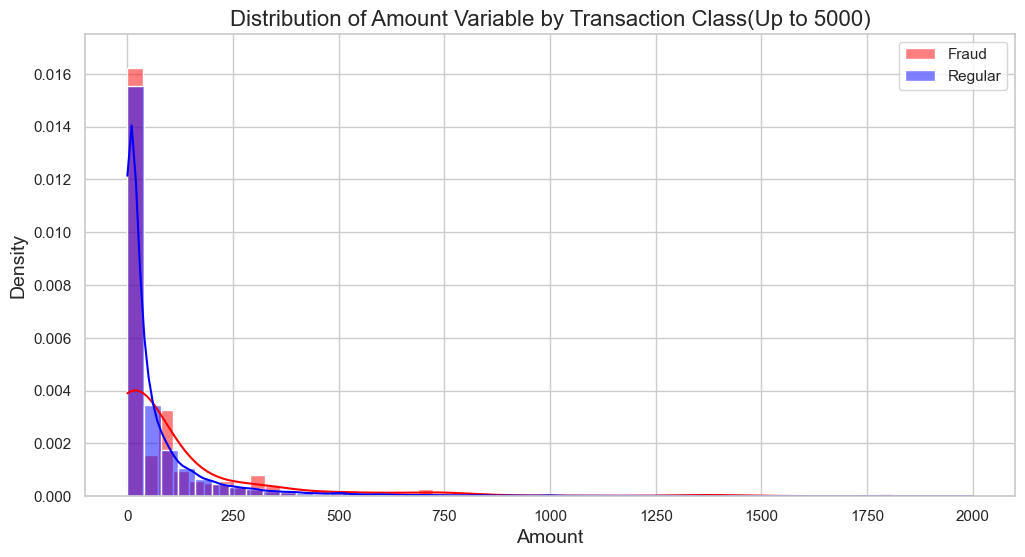

In [19]:
#Distribution of Amount
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
amount_filter=data[data['Amount'] <= 2000]
sns.histplot(amount_filter[amount_filter.Class==1]['Amount'],bins=50,kde=True,color='red',stat='density',alpha=0.5,label='Fraud')
sns.histplot(amount_filter[amount_filter.Class==0]['Amount'],bins=50,kde=True,color='blue',stat='density',alpha=0.5,label='Regular')
plt.title('Distribution of Amount Variable by Transaction Class(Up to 5000)',fontsize=16)
plt.xlabel('Amount',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.ylim(0,0.0175)
plt.legend()
plt.show()

Feature Engineering

In [21]:
#Feature Engineering
#Duplicate Values
print('There are {} duplicate values in regular transactions out of {}'.format(data[data['Class']==0].duplicated().sum(),data[data['Class']==0].shape[0]))
print('There are {} duplicate values in fraudulent transactions out of {}'.format(data[data['Class']==1].duplicated().sum(),data[data['Class']==1].shape[0]))

There are 1062 duplicate values in regular transactions out of 284315
There are 19 duplicate values in fraudulent transactions out of 492


In [23]:
print('No. of rows before dropping duplicates: {}.'.format(len(data)))
data.drop_duplicates(inplace=True)
print('No. of rows after dropping duplicates: {}.'.format(len(data)))

No. of rows before dropping duplicates: 284807.
No. of rows after dropping duplicates: 283726.


Handling Outliers

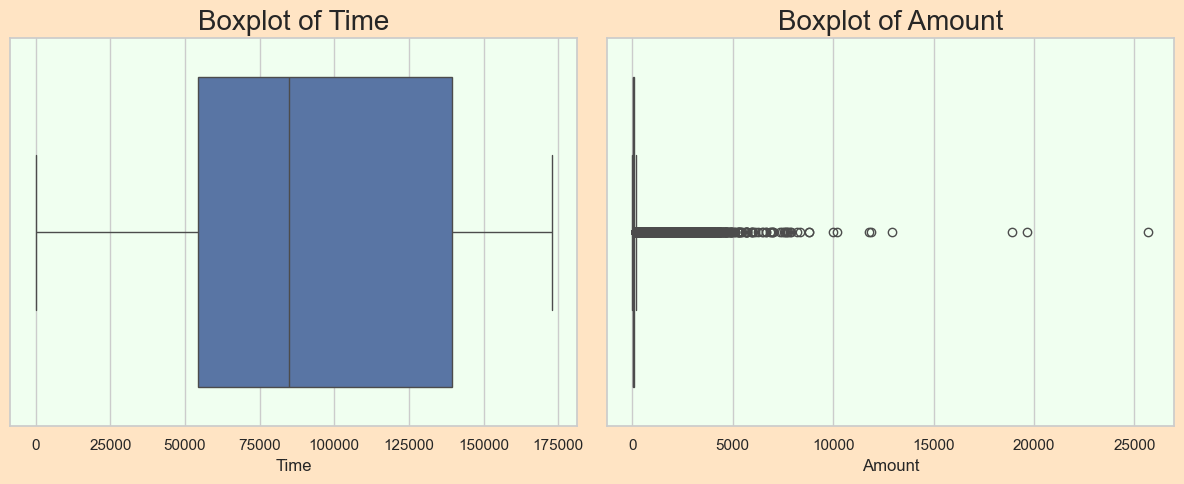

In [25]:
#Handling Outliers
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.boxplot(x=data['Time'], ax=ax1)
ax1.set_title('Boxplot of Time',fontsize=20)
ax1.set_facecolor('honeydew')

sns.boxplot(x=data['Amount'], ax=ax2)
ax2.set_title('Boxplot of Amount',fontsize=20)
ax2.set_facecolor('honeydew')
plt.tight_layout()
fig.set_facecolor('bisque')
plt.show()

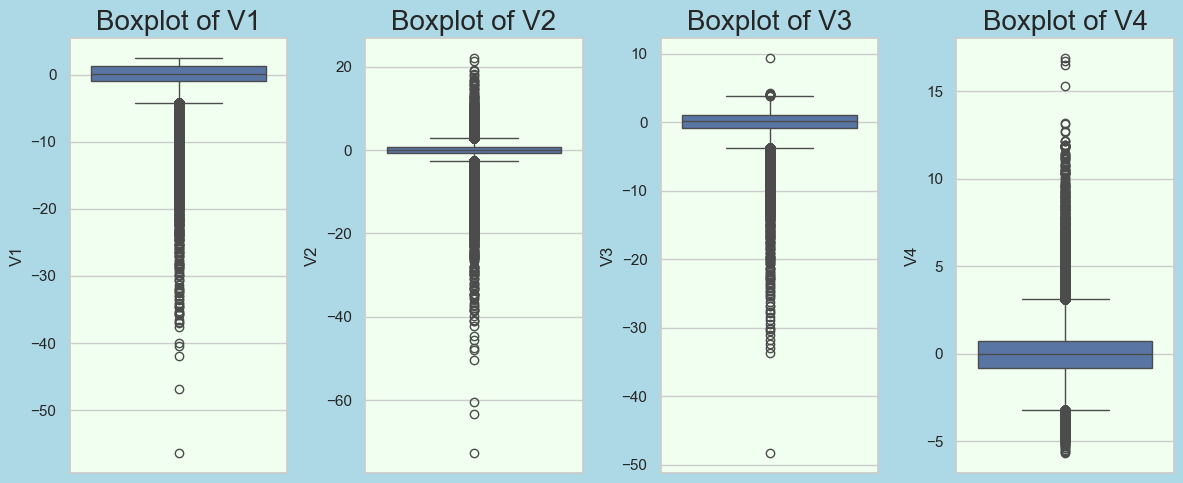

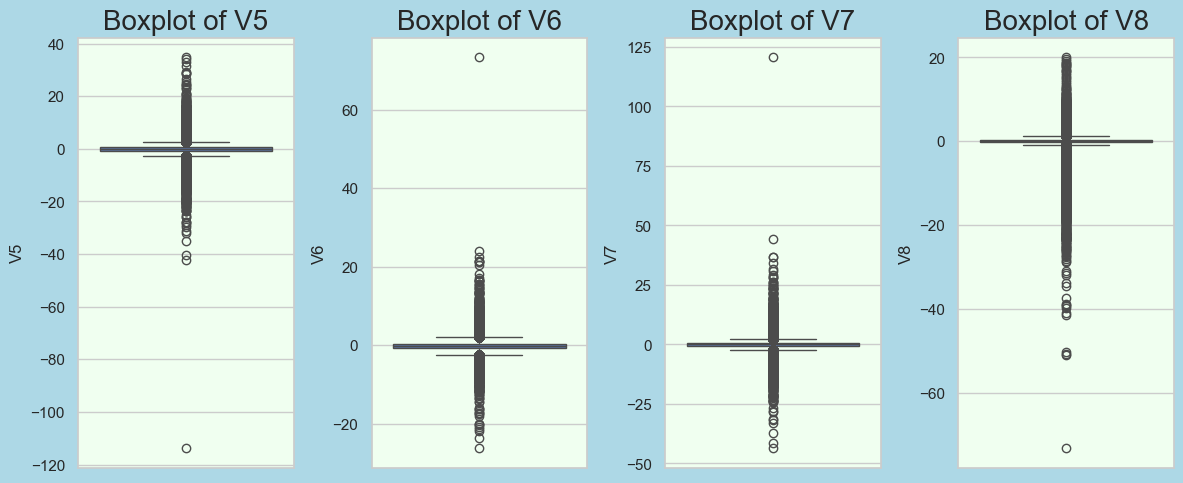

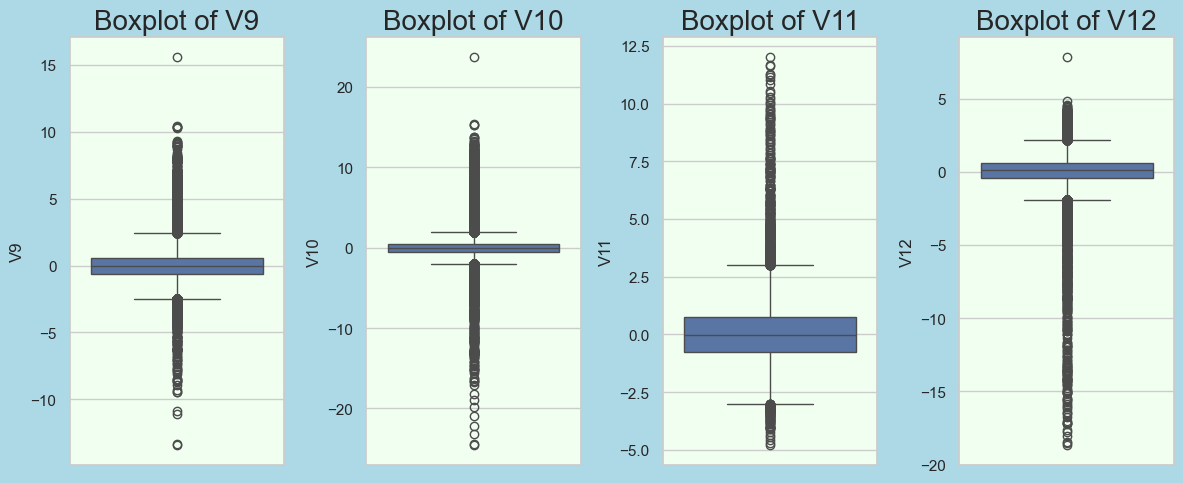

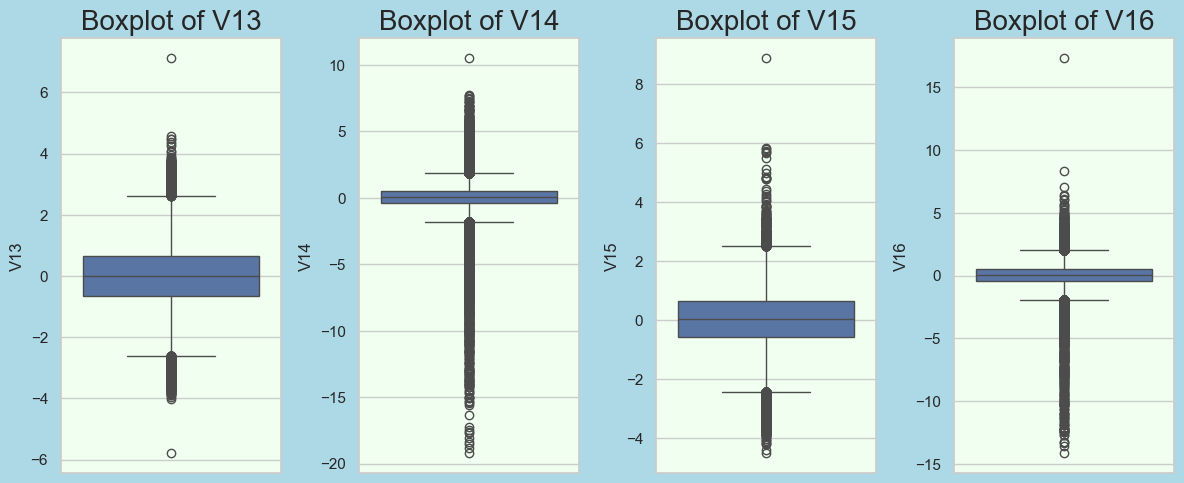

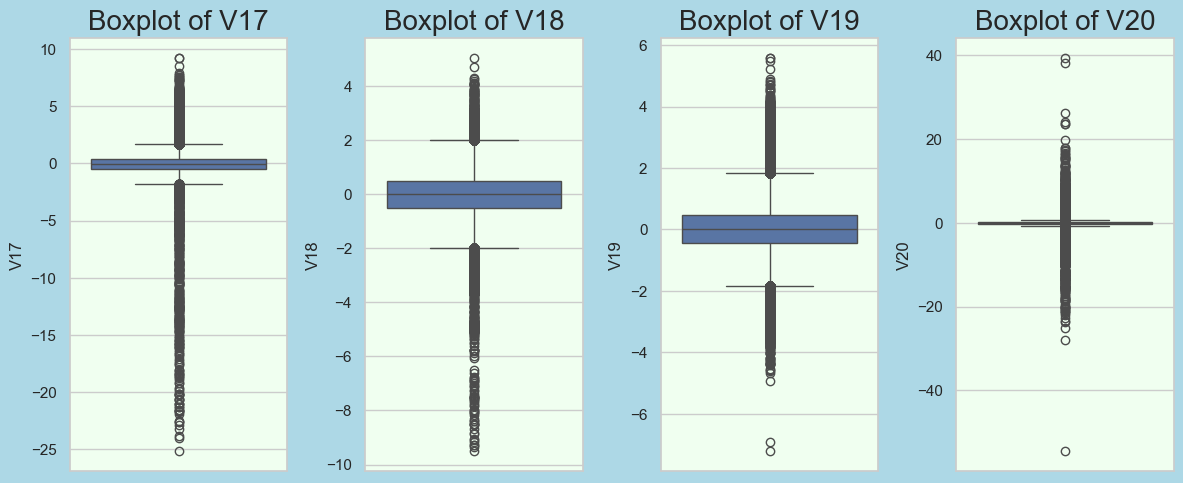

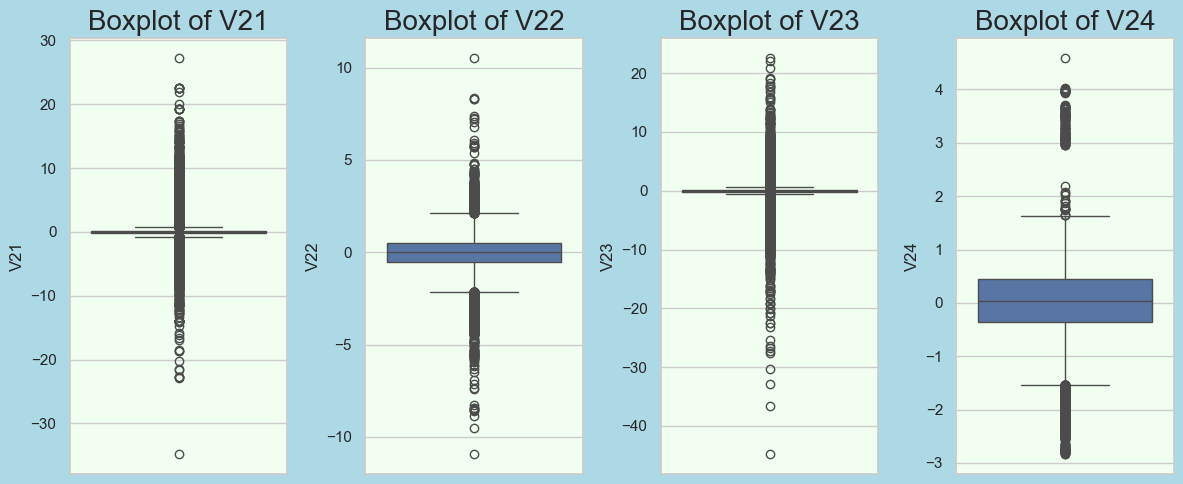

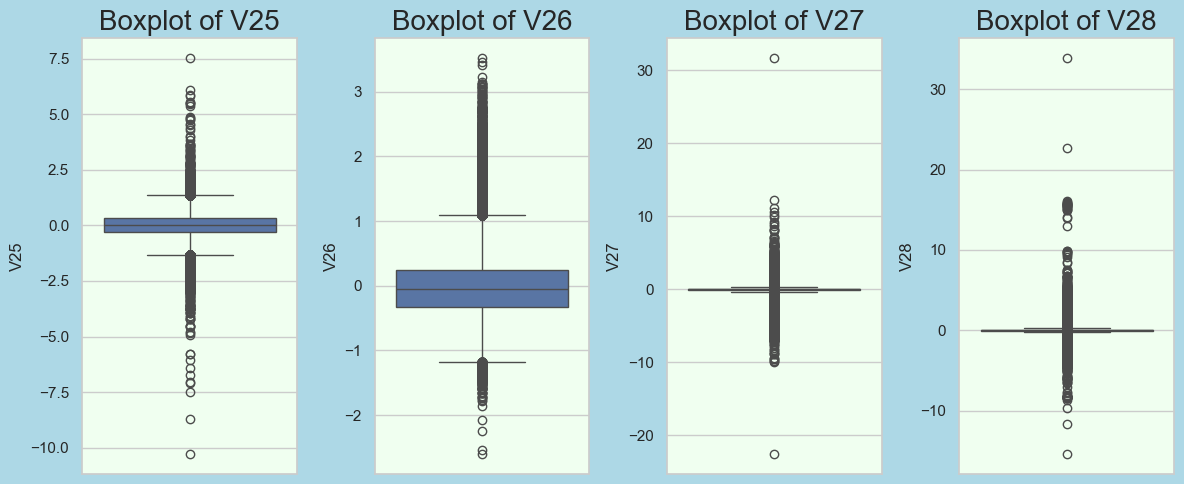

In [27]:
features=list(data.columns.values)
del features[0]
del features[28]
del features[28]

for i in range(7):
    fig, (ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(12,5))
    ax1=sns.boxplot(data[features[i*4]],ax=ax1)
    ax1.set_title('Boxplot of '+str(features[i*4]),fontsize=20)
    ax1.set_facecolor('honeydew')
    ax2=sns.boxplot(data[features[i*4+1]],ax=ax2)
    ax2.set_title('Boxplot of '+str(features[i*4+1]),fontsize=20)
    ax2.set_facecolor('honeydew')
    ax3=sns.boxplot(data[features[i*4+2]],ax=ax3)
    ax3.set_title('Boxplot of '+str(features[i*4+2]),fontsize=20)
    ax3.set_facecolor('honeydew')
    ax4=sns.boxplot(data[features[i*4+3]],ax=ax4)
    ax4.set_title('Boxplot of '+str(features[i*4+3]),fontsize=20)
    ax4.set_facecolor('honeydew')
    plt.tight_layout()
    fig.set_facecolor('#ADD8E6')

In [29]:
for column in features:
    print(f"Skewness for {column}: {data[column].skew()}")

Skewness for V1: -3.273271248440309
Skewness for V2: -4.6951619005404694
Skewness for V3: -2.1519839570997124
Skewness for V4: 0.6715041706728241
Skewness for V5: -2.414079246966253
Skewness for V6: 1.829880383771521
Skewness for V7: 2.890271192715498
Skewness for V8: -8.310970330052545
Skewness for V9: 0.5376630534496958
Skewness for V10: 1.2529670787468168
Skewness for V11: 0.34407419325686267
Skewness for V12: -2.1990082816149954
Skewness for V13: 0.06429340464018111
Skewness for V14: -1.9188037137586451
Skewness for V15: -0.3096590822936595
Skewness for V16: -1.0511614715174662
Skewness for V17: -3.690497194148406
Skewness for V18: -0.24866145737243997
Skewness for V19: 0.1083118109324772
Skewness for V20: -2.0431210560273323
Skewness for V21: 2.820033113572543
Skewness for V22: -0.18232972797521269
Skewness for V23: -5.867220791006341
Skewness for V24: -0.5521292366718961
Skewness for V25: -0.41574386205469593
Skewness for V26: 0.5802923172348093
Skewness for V27: -0.7538039138186

Caping Outliers

In [31]:
#Caping Outliers
def outlier_imputer(data,features):
    data_out=data.copy()
    for column in features:
        Q1=data_out[column].quantile(0.25)
        Q3=data_out[column].quantile(0.75)
        IQR=Q3-Q1
        lowerL=Q1-1.5*IQR
        higherL=Q3+1.5*IQR
        data_out.loc[data_out[column] < lowerL,column]=lowerL
        data_out.loc[data_out[column] > higherL,column]=higherL
    return data_out

data2=data.drop('Class',axis=1)
feats=list(data2.columns.values)
capped_data=outlier_imputer(data,feats)

In [33]:
pd.set_option("display.max_columns",1000)
capped_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-1.952416,1.109969,-0.121359,-1.828484,0.524980,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,0


After Capping

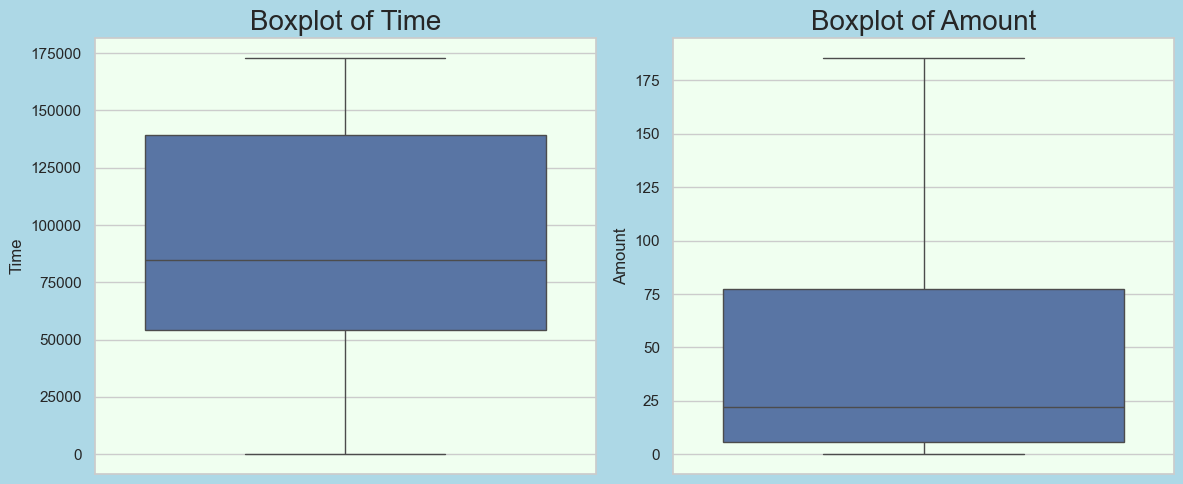

In [35]:
#After Capping
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1=sns.boxplot(capped_data['Time'],ax=ax1)
ax1.set_title('Boxplot of Time',fontsize=20)
ax1.set_facecolor('honeydew')
ax2=sns.boxplot(capped_data['Amount'],ax=ax2)
ax2.set_title('Boxplot of Amount',fontsize=20)
ax2.set_facecolor('honeydew')
plt.tight_layout()
fig.set_facecolor('#ADD8E6')

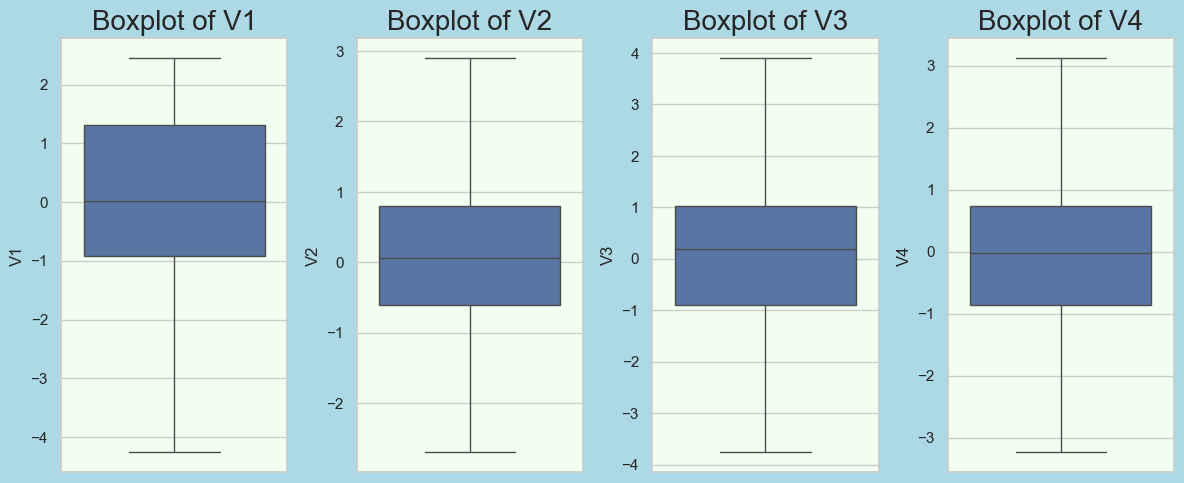

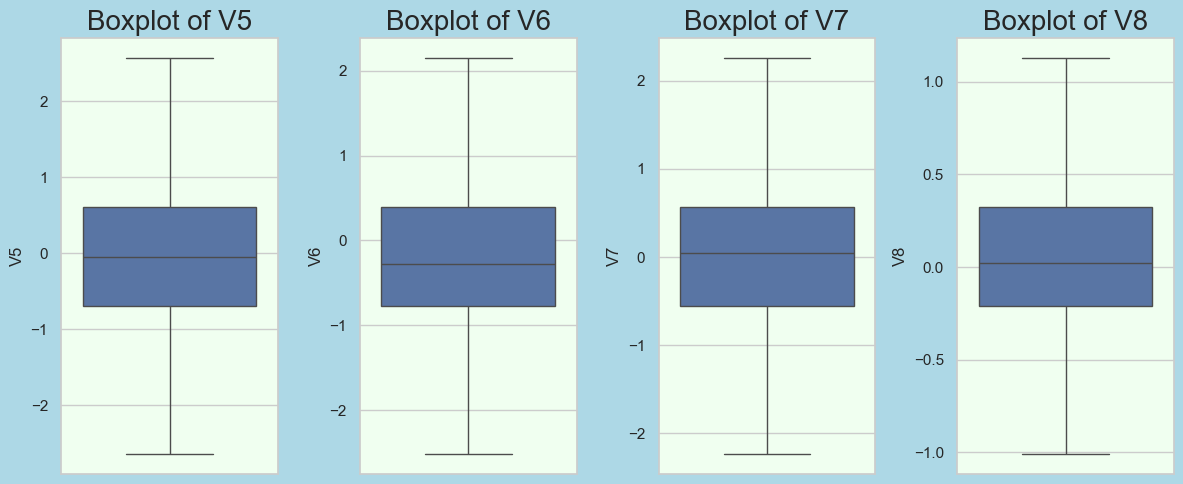

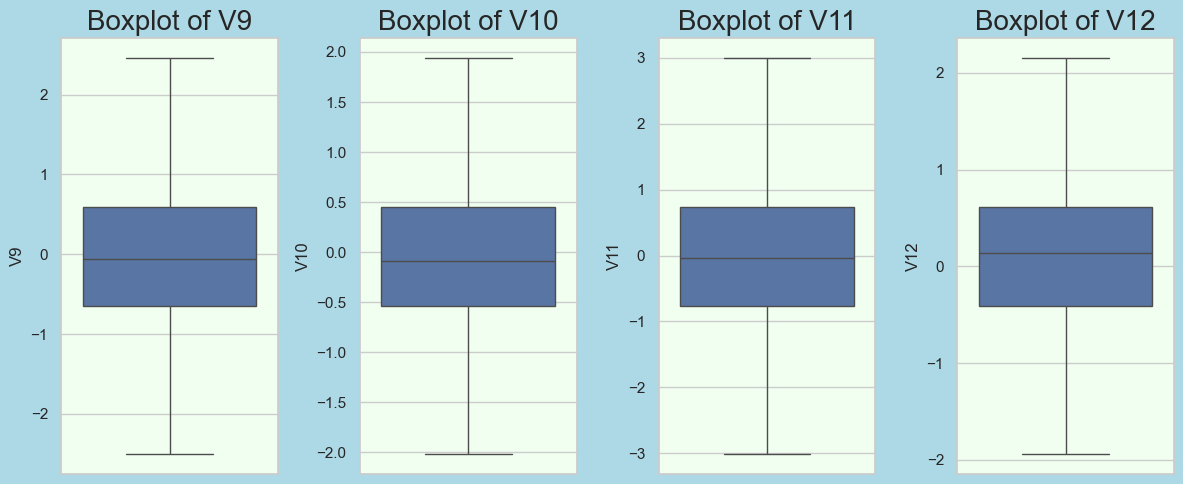

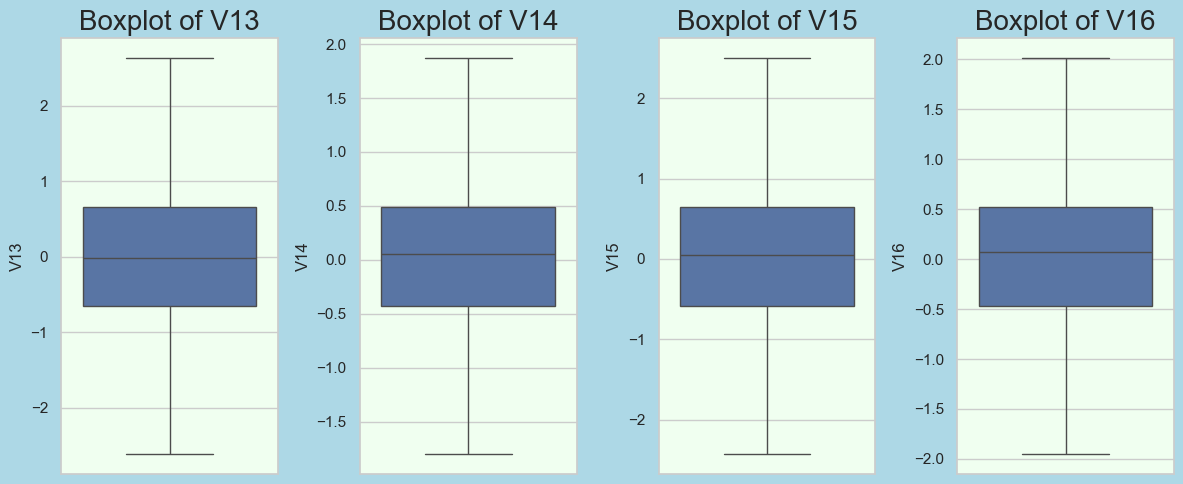

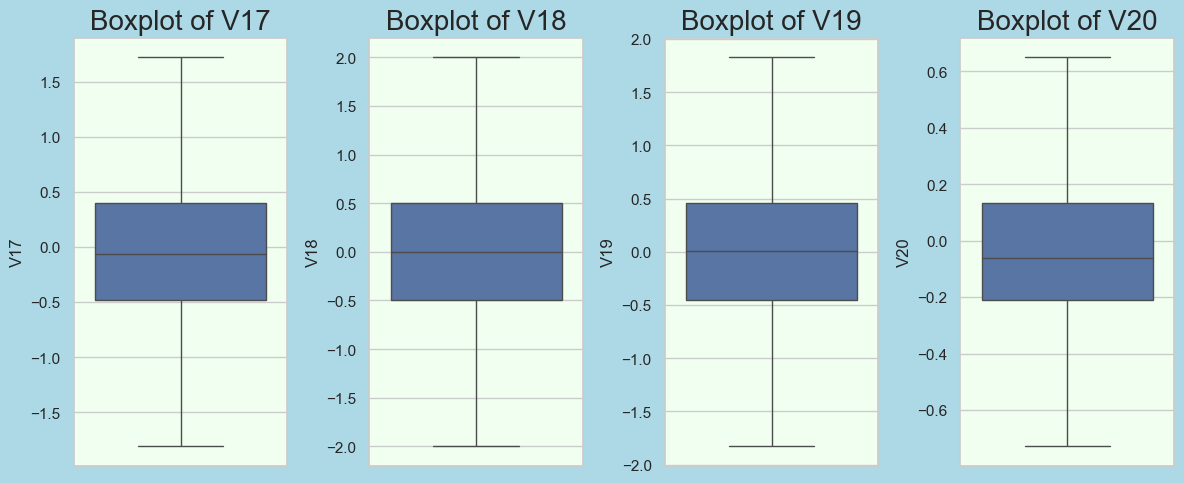

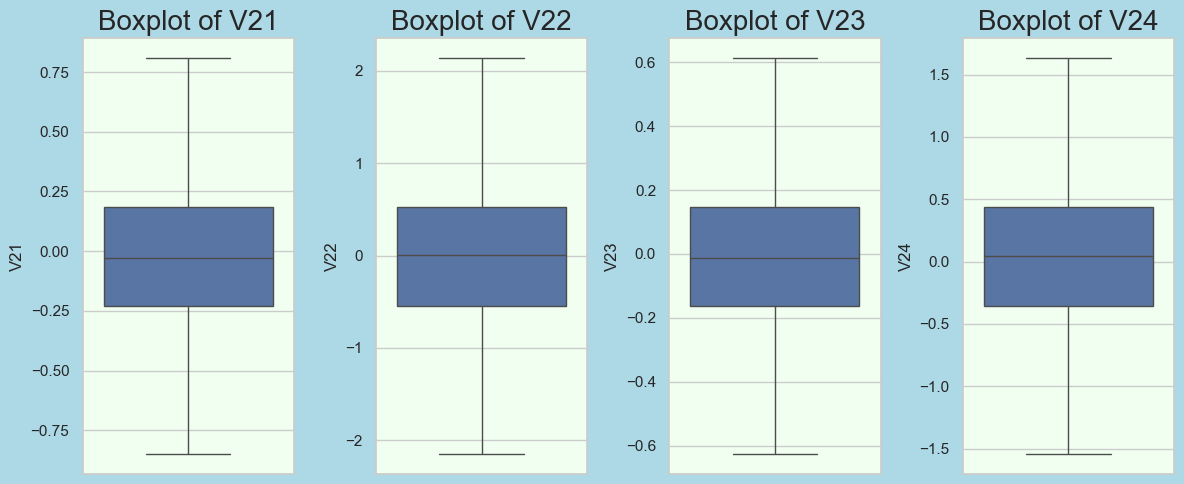

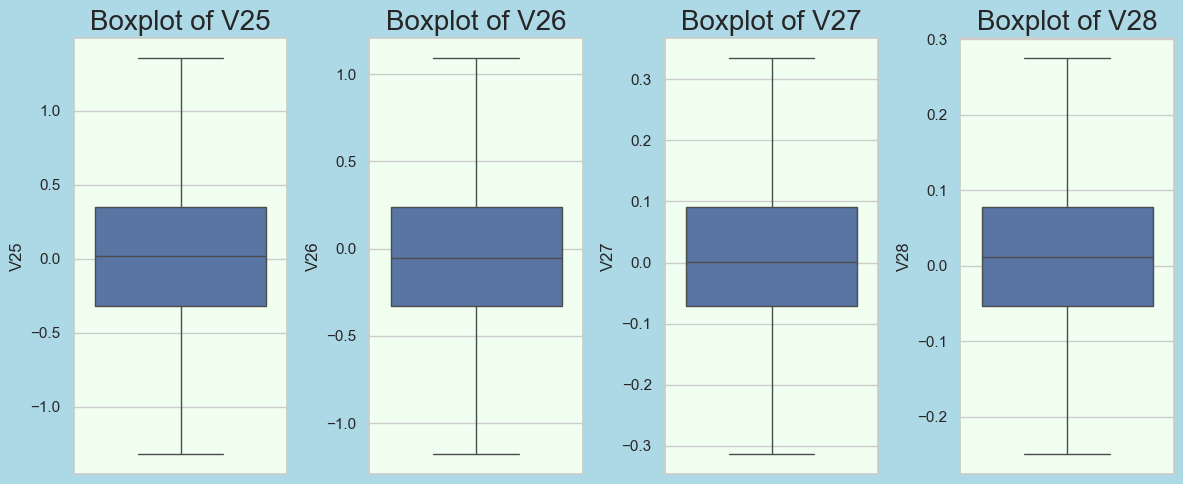

In [37]:
features_c=list(capped_data.columns.values)
del features_c[0]
del features_c[28]
del features_c[28]

for i in range(7):
    fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(12,5))
    
    ax1=sns.boxplot(capped_data[features_c[i*4]],ax=ax1)
    ax1.set_title('Boxplot of '+str(features_c[i*4]),fontsize=20)
    ax1.set_facecolor('honeydew')
    
    ax2=sns.boxplot(capped_data[features_c[i*4+1]],ax=ax2)
    ax2.set_title('Boxplot of '+str(features_c[i*4+1]),fontsize=20)
    ax2.set_facecolor('honeydew')
    
    ax3=sns.boxplot(capped_data[features_c[i*4+2]],ax=ax3)
    ax3.set_title('Boxplot of '+str(features_c[i*4+2]),fontsize=20)
    ax3.set_facecolor('honeydew')
    
    ax4=sns.boxplot(capped_data[features_c[i*4+3]],ax=ax4)
    ax4.set_title('Boxplot of '+str(features_c[i*4+3]),fontsize=20)
    ax4.set_facecolor('honeydew')
    plt.tight_layout()
    fig.set_facecolor('#ADD8E6')

Isolation Forest & Dropping Outliers

In [39]:
#Isolation Forest & Dropping Outliers
data3=data.copy()
data3=data3.drop('Class',axis=1)

In [41]:
model=IsolationForest(n_estimators=150,max_samples='auto',contamination=float(0.1),max_features=1.0)
model.fit(data3)

IsolationForest(contamination=0.1, n_estimators=150)

In [43]:
scores=model.decision_function(data3)
scores

array([ 0.06938735,  0.09097471, -0.00571566, ...,  0.04123412,
        0.03865766,  0.07169376])

In [45]:
anomaly=model.predict(data3)
anomaly

array([ 1,  1, -1, ...,  1,  1,  1])

In [47]:
data3['score']=scores
data3['anomaly']=anomaly
data3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,score,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.069387,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.090975,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,-0.005716,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.028726,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.060812,1


In [49]:
anomaly=data3.loc[data3['anomaly']==-1]
print('The total number of outliers is {} out of {}.'.format(len(anomaly),len(data)))

The total number of outliers is 28373 out of 283726.


In [51]:
#Dropping the outliers
anomaly_index=list(anomaly.index)
forest_data=data.drop(anomaly_index,axis=0).reset_index(drop=True)

Final Distribution

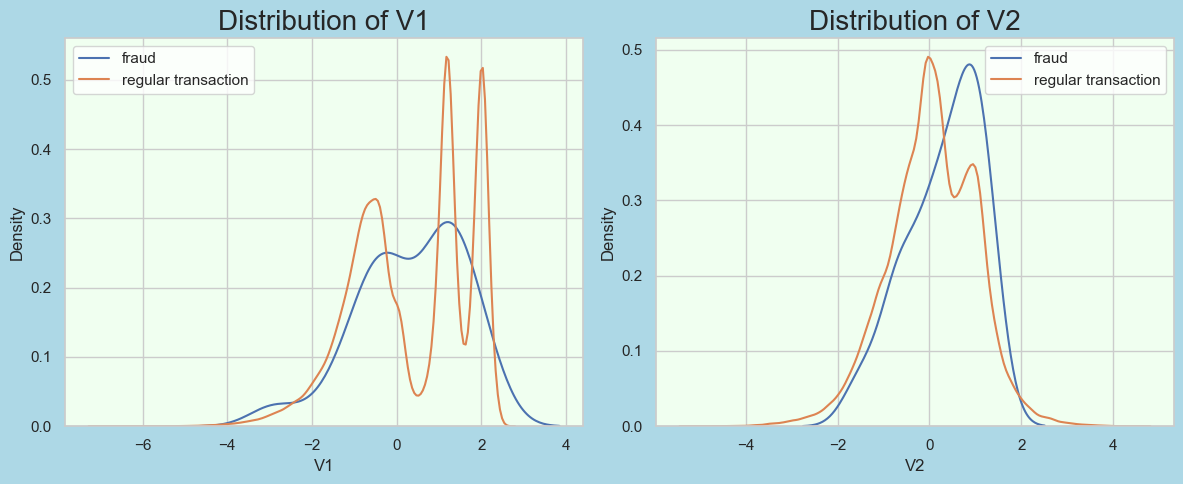

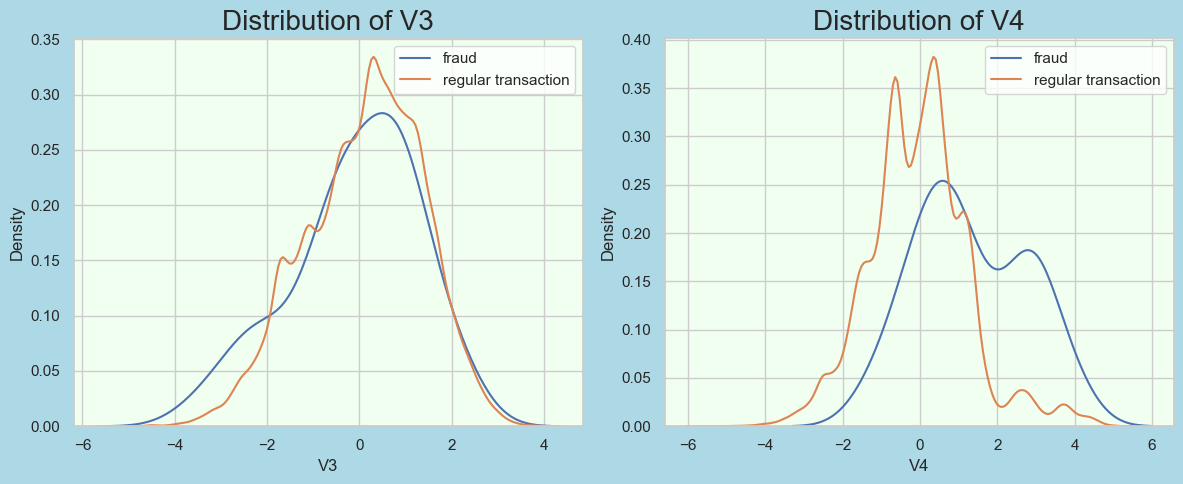

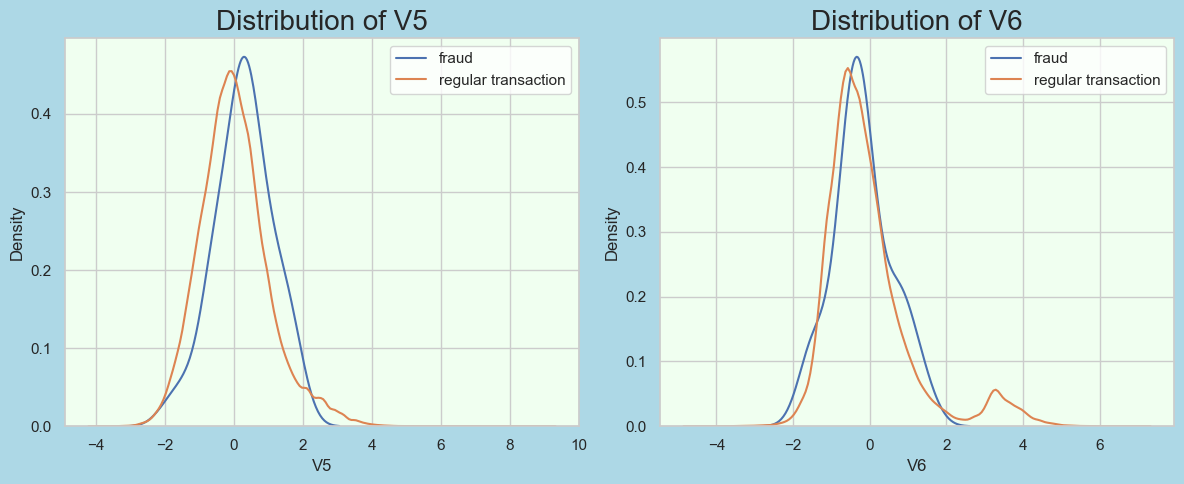

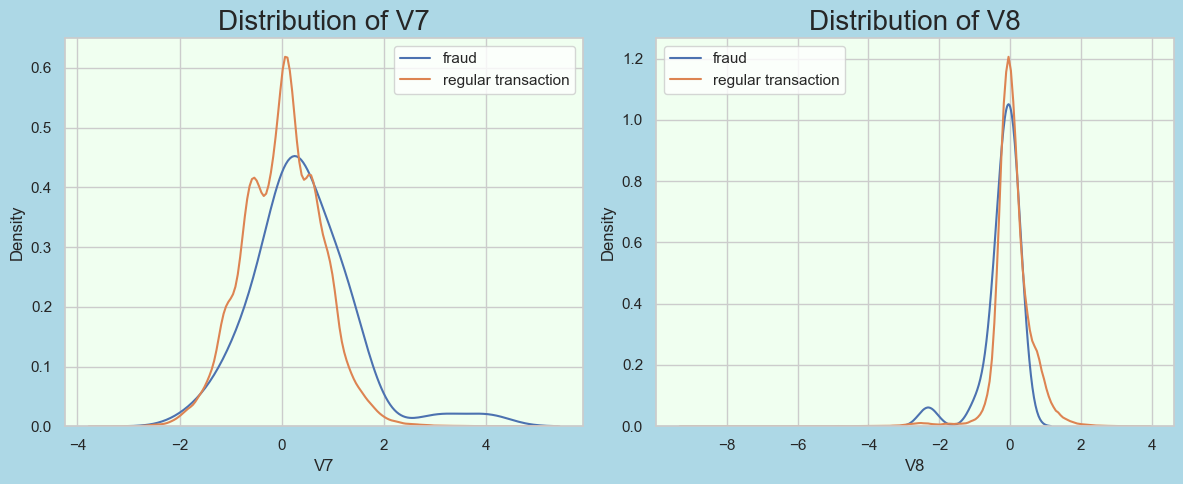

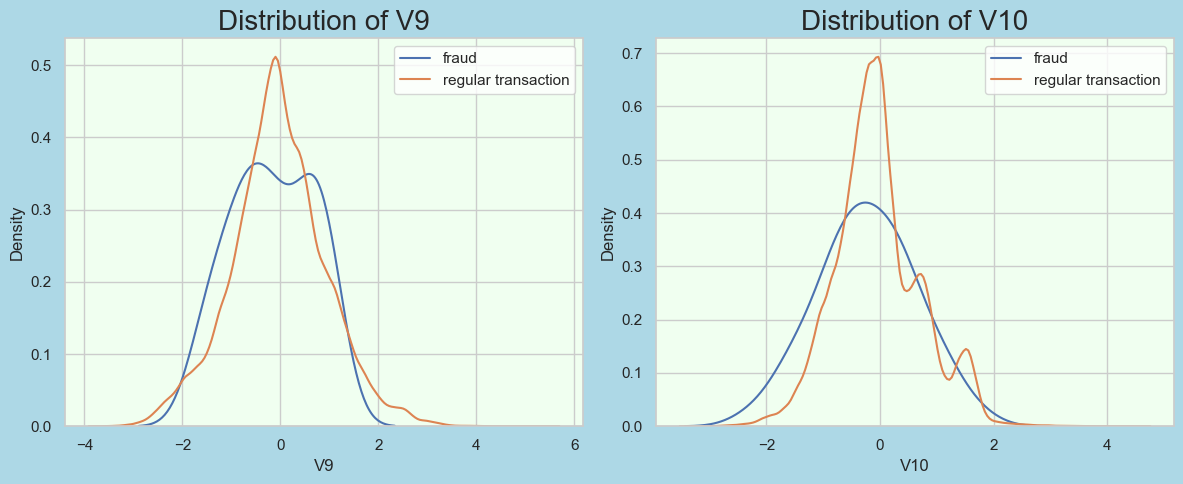

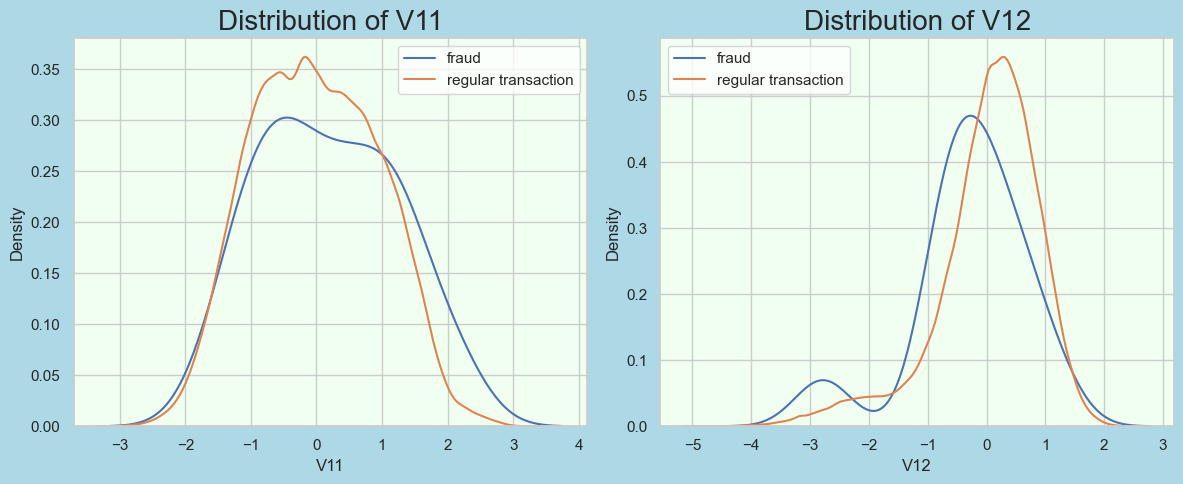

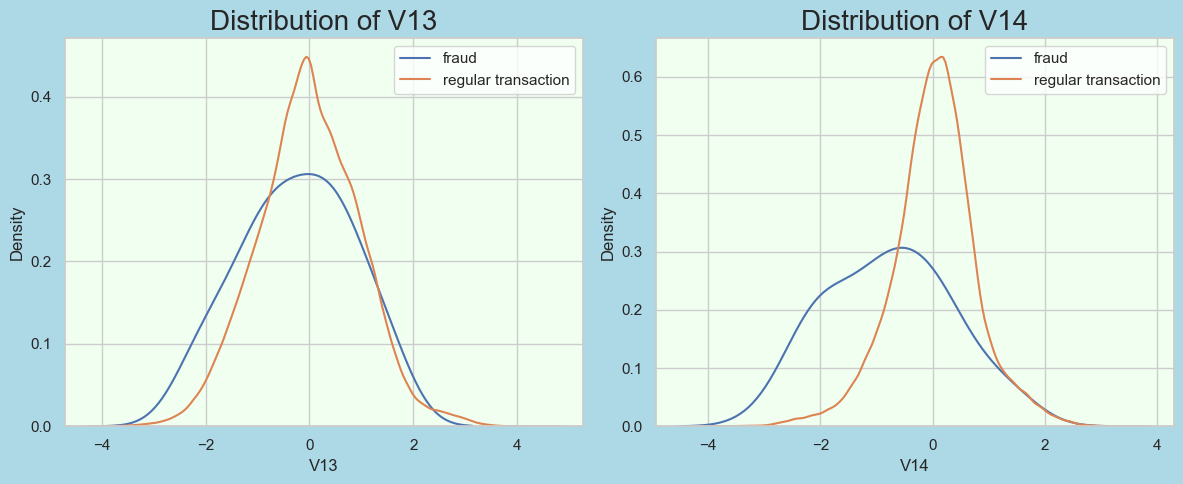

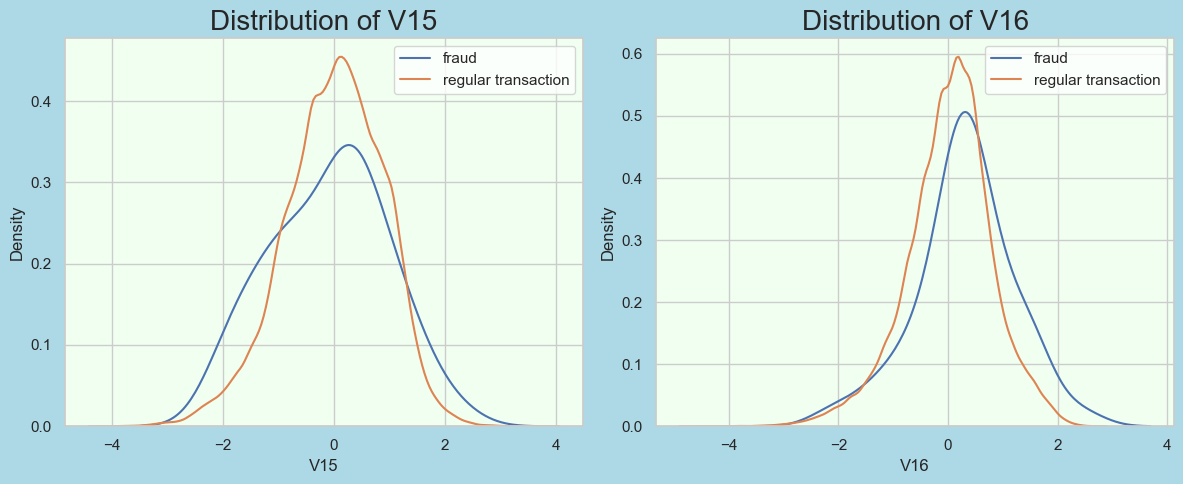

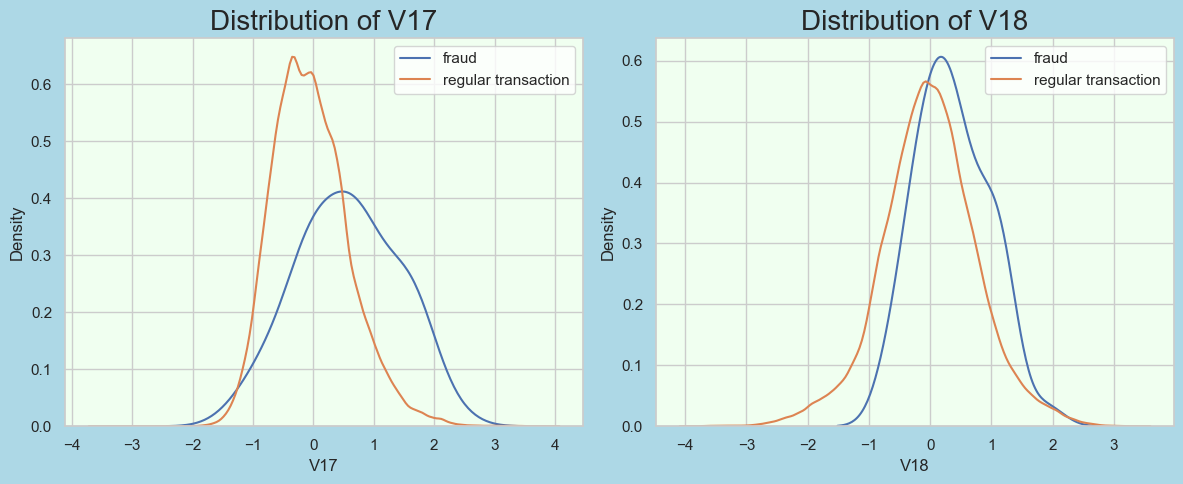

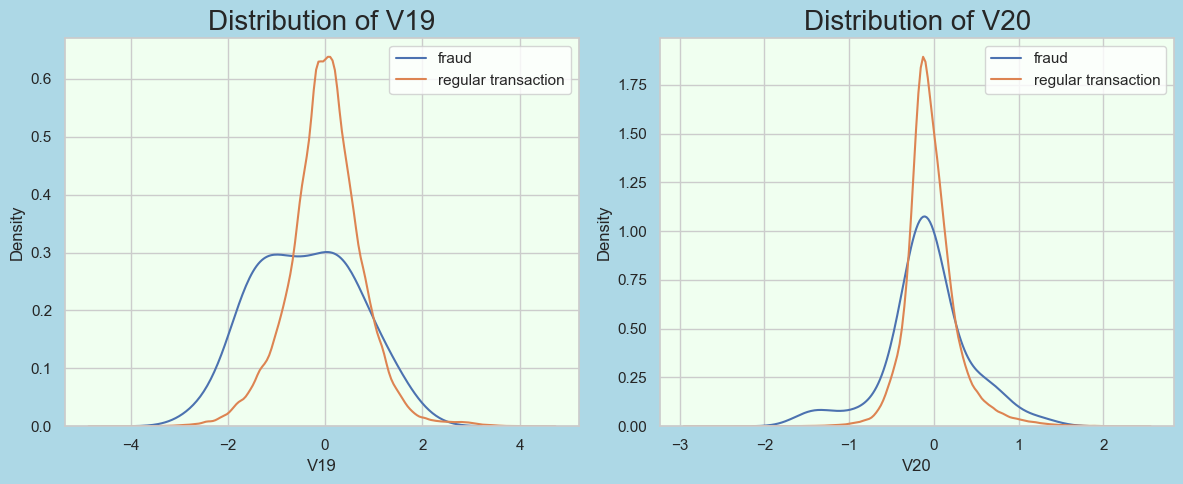

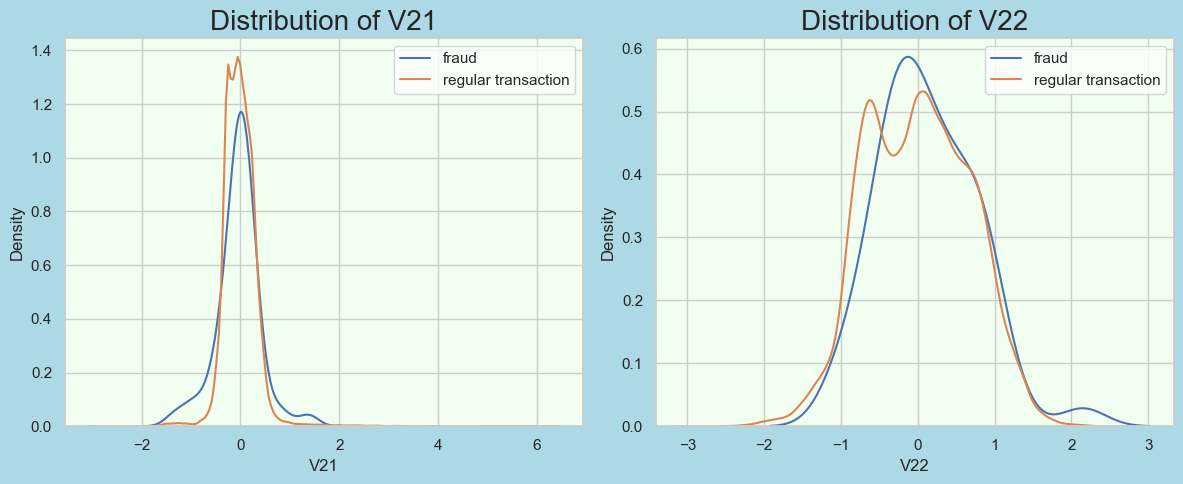

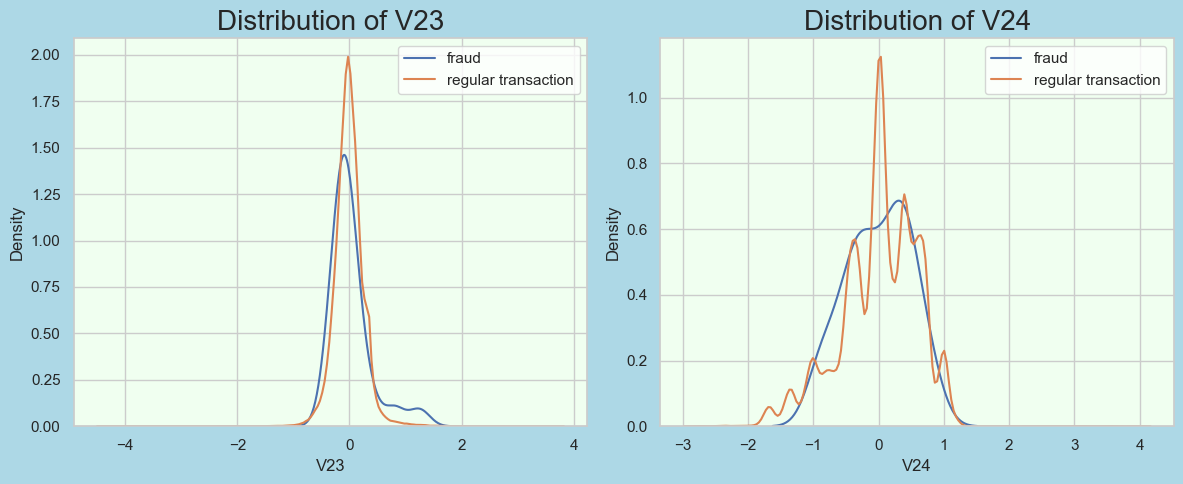

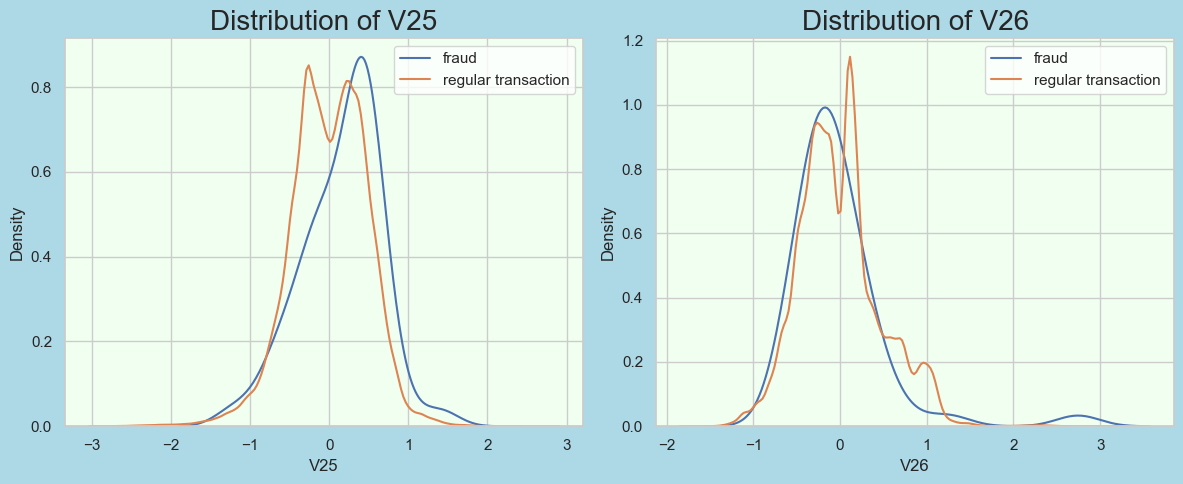

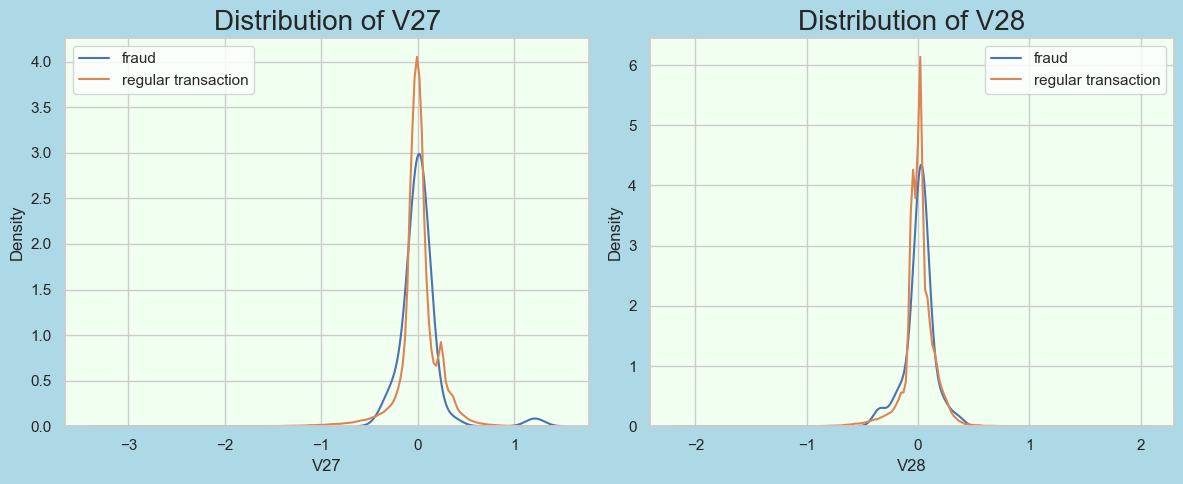

In [53]:
for i in range(14):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
    ax1=sns.distplot(forest_data[forest_data.Class==1][features[i*2]],ax=ax1,hist=False)
    ax1=sns.distplot(forest_data[forest_data.Class==0][features[i*2]],ax=ax1,hist=False)
    ax1.set_title('Distribution of '+str(features[i*2]),fontsize=20)
    ax1.set_facecolor('honeydew')
    ax1.legend(labels=['fraud','regular transaction'])
    
    ax2=sns.distplot(forest_data[forest_data.Class==1][features[i*2+1]],ax=ax2,hist=False)
    ax2=sns.distplot(forest_data[forest_data.Class==0][features[i*2+1]],ax=ax2,hist=False)
    ax2.set_title('Distribution of '+str(features[i*2+1]),fontsize=20)
    ax2.set_facecolor('honeydew')
    ax2.legend(labels=['fraud','regular transaction'])
    
    plt.tight_layout()
    fig.set_facecolor('#ADD8E6')

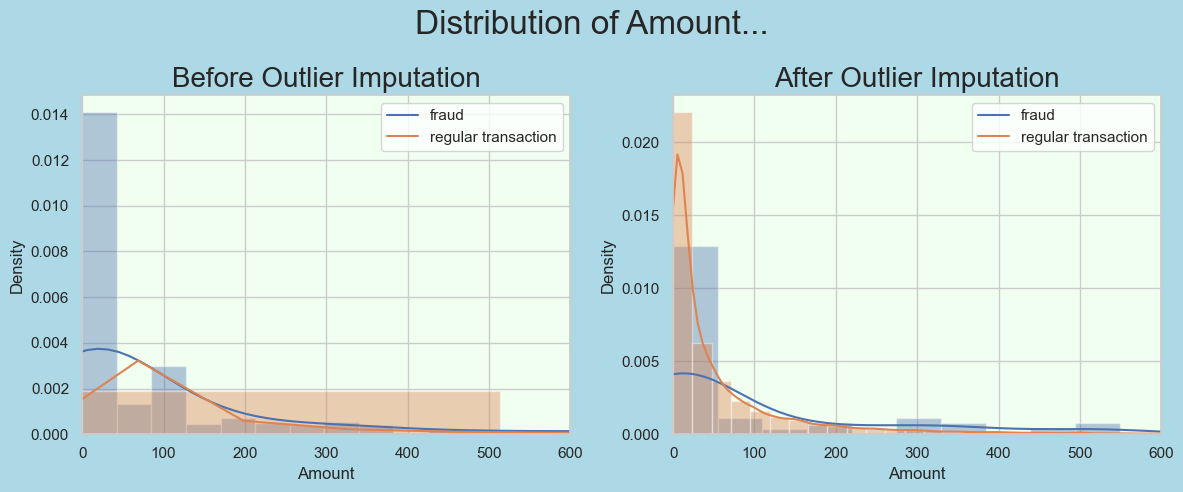

In [55]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#Before
ax1=sns.distplot(data['Amount'][data.Class==1],ax=ax1)
ax1=sns.distplot(data['Amount'][data.Class==0],ax=ax1)
ax1.set_xlim(0,600)
ax1.set_title('Before Outlier Imputation',fontsize=20)
ax1.legend(labels=['fraud','regular transaction'])
ax1.set_facecolor('honeydew')

#After
ax2=sns.distplot(forest_data['Amount'][forest_data.Class==1],ax=ax2)
ax2=sns.distplot(forest_data['Amount'][forest_data.Class==0],ax=ax2)
ax2.set_xlim(0,600)
ax2.set_title('After Outlier Imputation',fontsize=20)
ax2.legend(labels=['fraud','regular transaction'])
ax2.set_facecolor('honeydew')

#PLOT
fig.suptitle("Distribution of Amount...",fontsize=24)
plt.tight_layout()
fig.set_facecolor('#ADD8E6')

Feature Importance

In [57]:
#Feature Importance
X=forest_data.drop('Class',axis=1)
y=forest_data['Class']

In [59]:
random_forest=RandomForestClassifier(random_state=1,max_depth=4)
random_forest.fit(X,y)

RandomForestClassifier(max_depth=4, random_state=1)

In [61]:
FI=random_forest.feature_importances_
importances=pd.DataFrame({'feature':X.columns,'importance':np.round(FI,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(30)

,importance
feature,
V14,0.105
V4,0.071
V16,0.052
V28,0.051
V7,0.050
Amount,0.045
V22,0.045
V19,0.040
V18,0.039


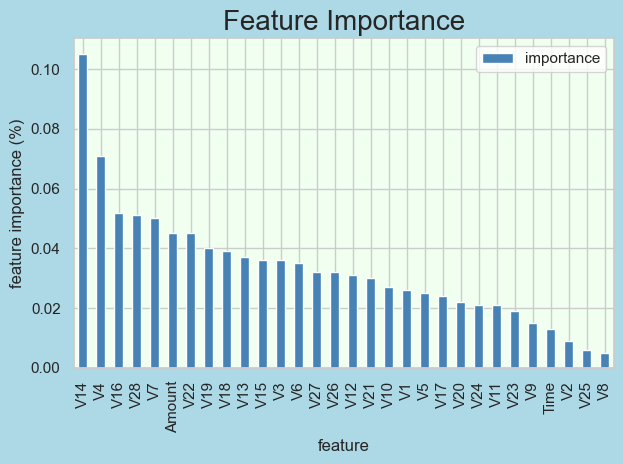

In [63]:
importances.plot.bar(color='steelblue')
plt.ylabel('feature importance (%)',fontsize=12)
plt.title('Feature Importance',fontsize=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('#ADD8E6')
plt.gca().set_facecolor('honeydew')
plt.show()

In [65]:
X=X.drop(['V2','V5','V6','V7','V8','V11','V15','V16','V18','V22','V23','V25','V26','V27','V28'],axis=1)

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Random Forest

In [69]:
# Random Forest
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [71]:
# Predictions on the test set
rf_test_preds = random_forest.predict(X_test)

def get_test_scores(model_name: str, preds, y_test_data):
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds, average='macro')
    recall = recall_score(y_test_data, preds, average='macro')
    F1 = f1_score(y_test_data, preds, average='macro')  # Corrected to f1_score
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [F1],
        'accuracy': [accuracy]
    })
    return table

In [73]:
# Generating the test results
rf_test_results = get_test_scores('RF (test)', rf_test_preds, y_test)

# Displaying the results
print(rf_test_results)

       model  precision  recall        F1  accuracy
0  RF (test)   0.499941     0.5  0.499971  0.999883


Undersampling

In [75]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
runs=RandomUnderSampler(random_state=42,sampling_strategy='majority')
X_resampled,y_resampled=runs.fit_resample(X_train,y_train)

In [77]:
#Random Forest Classifier
random_forest.fit(X_resampled,y_resampled)
rf_train_resampled_preds=random_forest.predict(X_resampled)
rf_train_under_results=get_test_scores('RF (train,undersampled)',rf_train_resampled_preds,y_resampled)
rf_train_under_results

,model,precision,recall,F1,accuracy
0,"RF (train,undersampled)",1.0,1.0,1.0,1.0


In [79]:
#Use model to predict on test data
rf_test_preds=random_forest.predict(X_test)
rf_test_results=get_test_scores('RF (test)',rf_test_preds,y_test)
rf_test_results

,model,precision,recall,F1,accuracy
0,RF (test),0.500136,0.7412,0.413663,0.704631


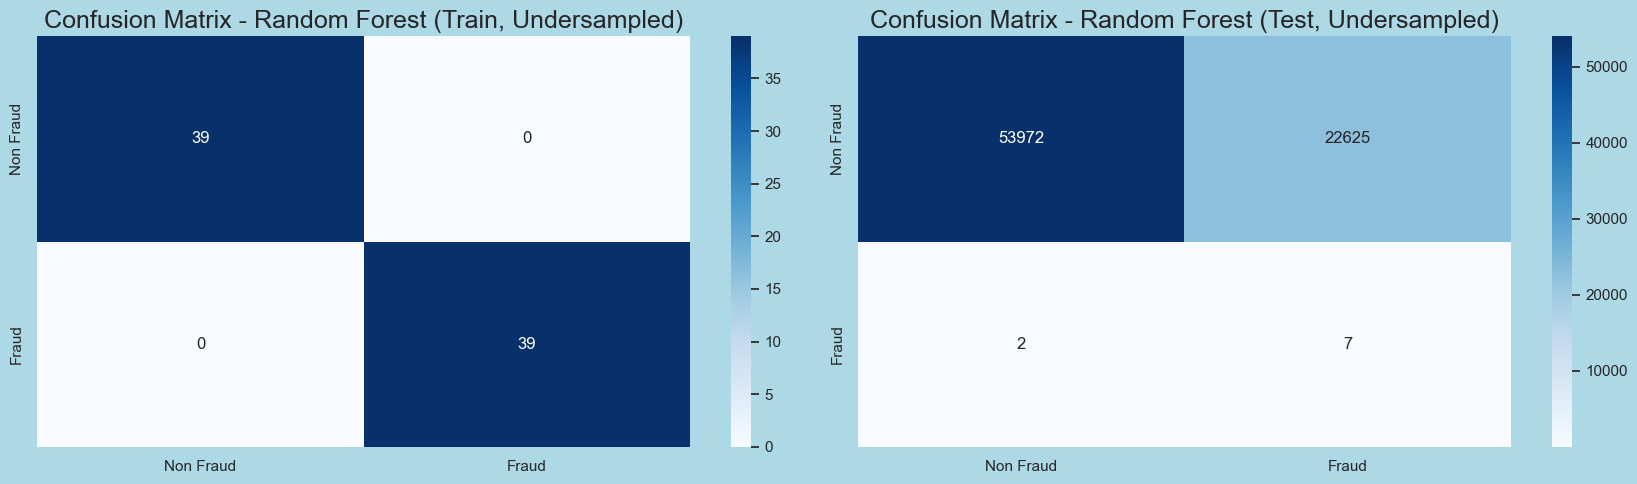

In [81]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(17,5))
cm1=confusion_matrix(y_resampled,rf_train_resampled_preds,labels=random_forest.classes_)
sns.heatmap(cm1,annot=True,ax=ax1,fmt='d',cmap='Blues')
ax1.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax1.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax1.set_title('Confusion Matrix - Random Forest (Train, Undersampled)',fontsize=18)
ax1.set_facecolor('honeydew')

cm2=confusion_matrix(y_test,rf_test_preds,labels=random_forest.classes_)
sns.heatmap(cm2,annot=True,ax=ax2,fmt='d',cmap='Blues')
ax2.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax2.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax2.set_title('Confusion Matrix - Random Forest (Test, Undersampled)',fontsize=18)
ax2.set_facecolor('honeydew')

plt.gcf().patch.set_facecolor('#ADD8E6')
plt.tight_layout()
plt.show()

XGBoost Classifier

In [83]:
#XGBoost Classifier
xgb=XGBClassifier(objective='binary:logistic',random_state=42)
xgb.fit(X_resampled,y_resampled)
xgb_train_resampled_preds=xgb.predict(X_resampled)
xgb_test_preds=xgb.predict(X_test)
xgb_test_results=get_test_scores('XGB (test)',xgb_test_preds,y_test)
xgb_test_results

,model,precision,recall,F1,accuracy
0,XGB (test),0.500163,0.762011,0.427696,0.746247


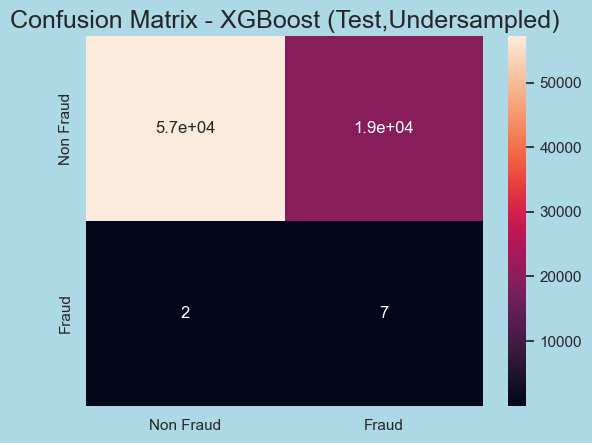

In [85]:
#Generate array of values for confusion matrix
cm=confusion_matrix(y_test,xgb_test_preds,labels=xgb.classes_)
ax=sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - XGBoost (Test,Undersampled)',fontsize=18)
plt.gcf().patch.set_facecolor('#ADD8E6')

In [66]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 8.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.4 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.2 MB/s eta 0:00:00


LightGBM

In [87]:
#light gbm
import lightgbm as lgb
lgbm=lgb.LGBMClassifier(objective='binary',random_state=42)
lgbm.fit(X_resampled,y_resampled)
lgbm_train_resampled_preds=lgbm.predict(X_resampled)
lgbm_test_preds=lgbm.predict(X_test)
lgbm_test_results=get_test_scores('LightGBM (test)',lgbm_test_preds,y_test)
lgbm_test_results

[LightGBM] [Info] Number of positive: 39, number of negative: 39
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 78, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

,model,precision,recall,F1,accuracy
0,LightGBM (test),0.500144,0.74797,0.4183,0.718168


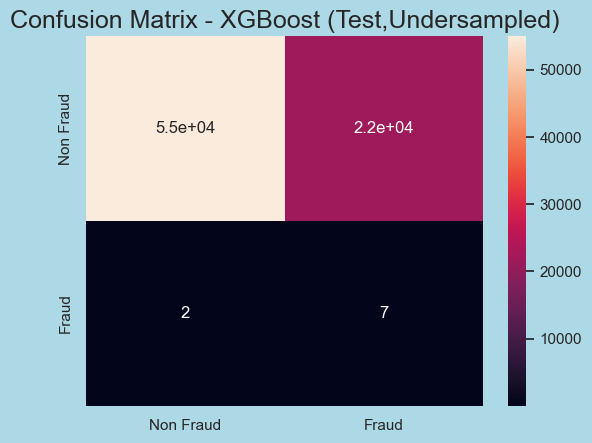

In [89]:
cm=confusion_matrix(y_test,lgbm_test_preds,labels=xgb.classes_)
ax=sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - XGBoost (Test,Undersampled)',fontsize=18)
plt.gcf().patch.set_facecolor('#ADD8E6')

In [74]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB 5.2 MB/s eta 0:00:20
    --------------------------------------- 1.6/101.7 MB 20.3 MB/s eta 0:00:05
    --------------------------------------- 2.3/101.7 MB 20.4 MB/s eta 0:00:05
   - -------------------------------------- 3.1/101.7 MB 18.1 MB/s eta 0:00:06
   - -------------------------------------- 3.7/101.7 MB 16.7 MB/s eta 0:00:06
   - -------------------------------------- 3.9/101.7 MB 15.4 MB/s eta 0:00:07
   - -------------------------------------- 4.6/101.7 MB 15.4 MB/s eta 0:00:07
   -- ------------------------------------- 5.3/101.7 MB 15.2 MB/s eta 0:00:07
   -- ------------------------------------- 5.9/101.7 MB 15.0 MB/s eta 0:00:07
   -- ------------------------------------- 6.6/101.7 MB 15.1 MB/s eta 0:00:07
   -- ------------------------------------- 7.3/101.7 MB 14.6 MB/s eta 0:00:07
   --- ------------------------------------ 8.1/101.7 MB 14.4

CatBoost

In [91]:
#catboost
from catboost import CatBoostClassifier
catboost=CatBoostClassifier(iterations=1000,learning_rate=0.1,depth=6,random_seed=42,silent=True)
catboost.fit(X_resampled,y_resampled)
catboost_train_resampled_preds=catboost.predict(X_resampled)
catboost_test_preds=catboost.predict(X_test)
catboost_test_results=get_test_scores('CatBoost (test)',catboost_test_preds,y_test)
catboost_test_results

,model,precision,recall,F1,accuracy
0,CatBoost (test),0.500174,0.769348,0.43249,0.76092


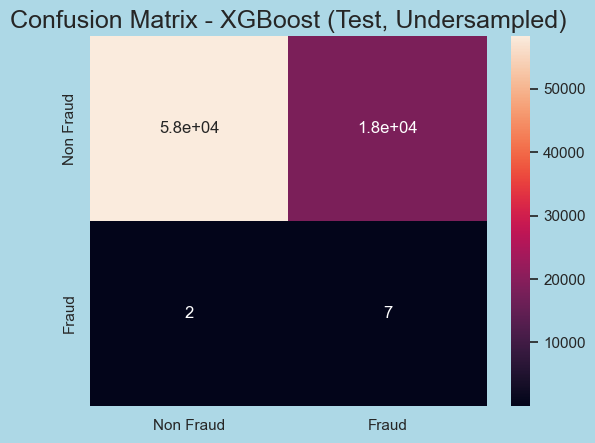

In [93]:
cm=confusion_matrix(y_test,catboost_test_preds,labels=xgb.classes_)
ax=sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - XGBoost (Test, Undersampled)',fontsize=18)
plt.gcf().patch.set_facecolor('#ADD8E6')

Oversampling

In [95]:
#Oversampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_oversampled,y_oversampled=smote.fit_resample(X_train,y_train)
random_forest.fit(X_oversampled,y_oversampled)
rf_train_oversampled_preds=random_forest.predict(X_oversampled)
rf_train_oversampled_results=get_test_scores('RF (train,oversampled)',rf_train_oversampled_preds,y_oversampled)
rf_train_oversampled_results

,model,precision,recall,F1,accuracy
0,"RF (train,oversampled)",1.0,1.0,1.0,1.0


In [97]:
#Use the model to predict on test data
rf_test_preds=random_forest.predict(X_test)
rf_test_results=get_test_scores('RF (test)',rf_test_preds,y_test)
rf_test_results

,model,precision,recall,F1,accuracy
0,RF (test),0.499941,0.499987,0.499964,0.999856


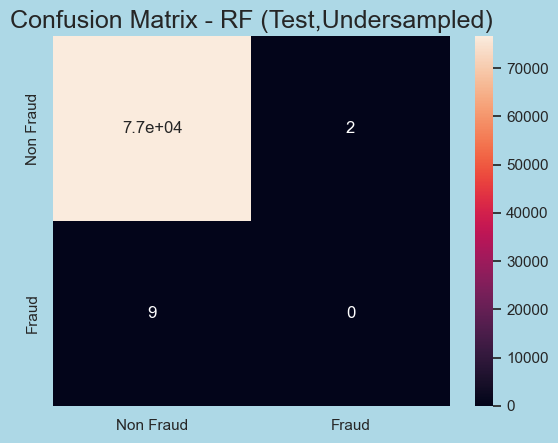

In [99]:
#Generate array of values for confusion matrix
cm=confusion_matrix(y_test,rf_test_preds,labels=xgb.classes_)
ax=sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - RF (Test,Undersampled)',fontsize=18)
plt.gcf().patch.set_facecolor('#ADD8E6')

XGBoost Classifier

In [101]:
#XGBoost Classifier
xgb=XGBClassifier(objective='binary:logistic',random_state=42)
xgb.fit(X_oversampled,y_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [103]:
#Use the model to predict on test data
xgb_test_preds=xgb.predict(X_test)
xgb_test_results=get_test_scores('XGB (test)',xgb_test_preds,y_test)
xgb_test_results

,model,precision,recall,F1,accuracy
0,XGB (test),0.511853,0.555288,0.519448,0.99936


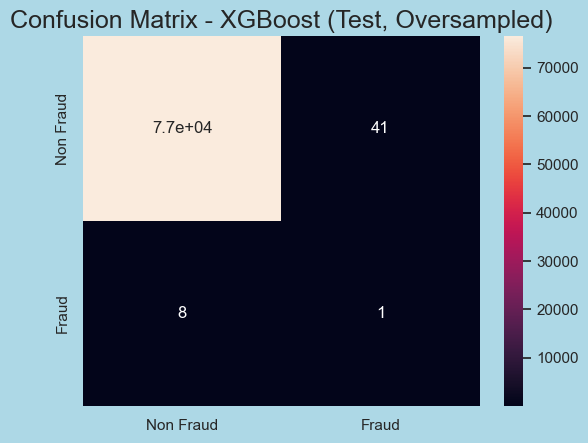

In [105]:
#Generate array of values for confusion matrix
cm=confusion_matrix(y_test,xgb_test_preds,labels=xgb.classes_)
ax=sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - XGBoost (Test, Oversampled)',fontsize=18)
plt.gcf().patch.set_facecolor('#ADD8E6')

Under Sampling RF + Tuning

In [107]:
#Under Sampling RF + Tuning
#K-fold stratified cross validation
kfold=StratifiedKFold(n_splits=10)
kfold

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
RFC = RandomForestClassifier(random_state=42)
# Define the Stratified K-Folds cross-validator
kfold = StratifiedKFold(n_splits=10)
rf_param_dist = {
    'max_depth': [2, 3, 4, 5, None],
    'max_features': [1.0],
    'max_samples': [1.0],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 4],
    'n_estimators': [200, 300, 400]
}

rsRFC = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_dist,
    n_iter=100,
    cv=kfold,
    scoring="f1",
    random_state=42
)
rsRFC.fit(X_resampled, y_resampled)
best_params = rsRFC.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_samples': 1.0, 'max_features': 1.0, 'max_depth': 5}


In [111]:
#Use the model to predict on test data
rf_test_preds=rsRFC.predict(X_test)
rf_test_results=get_test_scores('RF (test)',rf_test_preds,y_test)
rf_test_results

,model,precision,recall,F1,accuracy
0,RF (test),0.500193,0.743219,0.450905,0.819753


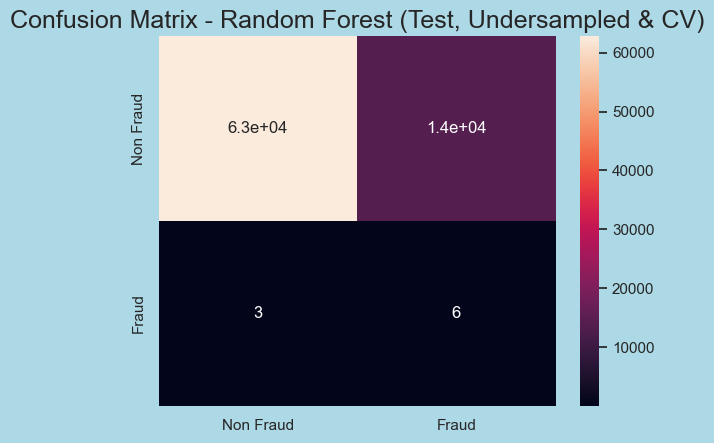

In [113]:
#Generate array of values for confusion matrix
cm=confusion_matrix(y_test,rf_test_preds,labels=rsRFC.classes_)
ax=sns.heatmap(cm,annot=True)
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.set_title('Confusion Matrix - Random Forest (Test, Undersampled & CV)',fontsize=18)
plt.gcf().patch.set_facecolor('#ADD8E6')

Under Sampling RF + Voting Classifier

In [115]:
#Under Sampling RF + Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
lgbm = LGBMClassifier(objective='binary', random_state=42)
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, silent=True)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lgbm', lgbm),
        ('xgb', xgb),
        ('catboost', catboost)
    ],
    voting='hard'  # Use 'soft' for soft voting
)

# Fit the Voting Classifier on the resampled training data
voting_clf.fit(X_resampled, y_resampled)

# Use the model to predict on train data
voting_train_resampled_preds = voting_clf.predict(X_resampled)

# Use the model to predict on test data
voting_test_preds = voting_clf.predict(X_test)

# Get test results using your scoring function
voting_test_results = get_test_scores('Voting Classifier (test)', voting_test_preds, y_test)
print(voting_test_results)

[LightGBM] [Info] Number of positive: 39, number of negative: 39
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 78, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

Total Fraud Transactions: 492
Total Non-Fraud Transactions: 284315
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.9206 - val_loss: 0.8117
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step



Enter the feature name (e.g., V1, V5, V10):  V23
Enter the value for V23:  -2.5
Enter the transaction amount:  2500000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step

Transaction Status: Fraud
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


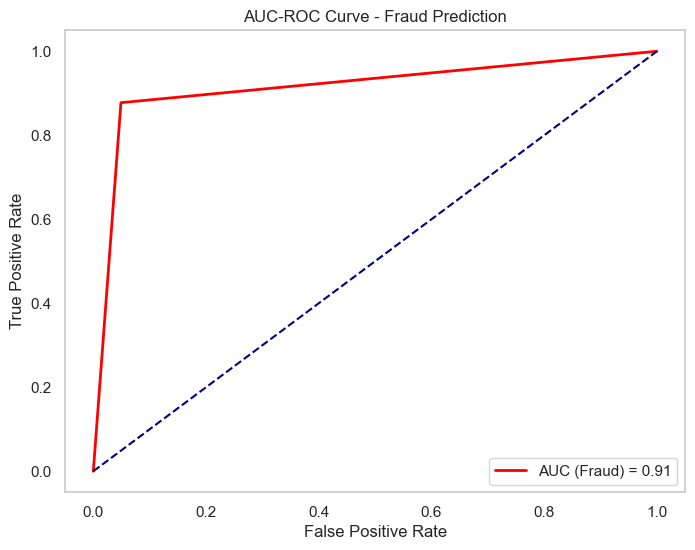

In [117]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import roc_curve, auc

# Load Dataset
file_path=r"C:\Users\Mahalakshmi\OneDrive\Documents\creditcard.csv"
df=pd.read_csv(file_path)

# Display total Fraud and Non-Fraud transactions
fraud_count = df[df["Class"] == 1].shape[0]
non_fraud_count = df[df["Class"] == 0].shape[0]

print(f"Total Fraud Transactions: {fraud_count}")
print(f"Total Non-Fraud Transactions: {non_fraud_count}")

# Data Preprocessing
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
iso_forest.fit(X_train)

# Autoencoder Model
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)

decoded = Dense(16, activation="relu")(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=1, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Determine reconstruction error threshold
reconstructed = autoencoder.predict(X_train)
reconstruction_error = np.mean(np.abs(reconstructed - X_train), axis=1)
threshold = np.percentile(reconstruction_error, 95)

# Function to take user input dynamically
def get_user_input():
    """
    Asks the user for a feature name and its value, along with the transaction amount.
    """
    feature_name = input("\nEnter the feature name (e.g., V1, V5, V10): ")
    
    if feature_name not in df.columns:
        print("Invalid feature name! Please enter a valid feature from the dataset.")
        return get_user_input()
    
    while True:
        try:
            feature_value = float(input(f"Enter the value for {feature_name}: "))
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
    
    while True:
        try:
            amount = float(input("Enter the transaction amount: "))
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
    
    return feature_name, feature_value, amount

# Fraud Detection Function
def predict_fraud(model1, model2, feature_name, feature_value, amount, threshold, scaler):
    """
    Predicts whether a transaction is fraudulent or not based on user input.
    """
    # Create an empty feature array
    input_array = np.zeros((1, X.shape[1]))

    # Set the user-provided feature value
    feature_index = df.columns.get_loc(feature_name)
    input_array[0, feature_index] = feature_value

    # Set the Amount value
    amount_index = df.columns.get_loc("Amount")
    input_array[0, amount_index] = amount

    # Scale input data
    input_scaled = scaler.transform(input_array)

    # Isolation Forest Prediction
    iso_pred = model1.predict(input_scaled)
    iso_pred = np.where(iso_pred == -1, 1, 0)

    # Autoencoder Prediction
    reconstructed = model2.predict(input_scaled)
    error = np.mean(np.abs(reconstructed - input_scaled), axis=1)
    auto_pred = np.where(error > threshold, 1, 0)

    # Combine Predictions
    final_prediction = (iso_pred + auto_pred) > 0
    return "Fraud" if final_prediction else "Non-Fraud", final_prediction

# Get User Input
feature_name, feature_value, amount = get_user_input()

# Predict Fraud or Non-Fraud
result, prediction_value = predict_fraud(iso_forest, autoencoder, feature_name, feature_value, amount, threshold, scaler)
print(f"\nTransaction Status: {result}")

# -------------------------------
# AUC-ROC Curve Visualization Based on Prediction Outcome
# -------------------------------

# Generate predictions for test set
iso_preds = iso_forest.predict(X_test)
iso_preds = np.where(iso_preds == -1, 1, 0)

reconstructed_test = autoencoder.predict(X_test)
error_test = np.mean(np.abs(reconstructed_test - X_test), axis=1)
auto_preds = np.where(error_test > threshold, 1, 0)

# Combine both models
final_preds = (iso_preds + auto_preds) > 0

# Compute AUC-ROC
fpr, tpr, _ = roc_curve(y_test, final_preds)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC Curve
plt.figure(figsize=(8, 6))

if result == "Fraud":
    plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC (Fraud) = {roc_auc:.2f}')
else:
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC (Non-Fraud) = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUC-ROC Curve - {result} Prediction')
plt.legend(loc="lower right")
plt.grid()
plt.show()